In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

In [27]:
from google.colab import drive
import zipfile
import os

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dataset 1: Fresh_and_Rotten_Classification
zip_path1 = "/content/drive/MyDrive/Colab Notebooks/Fresh_and_Rotten_Classification.zip"
extract_path1 = "/content/Fresh_and_Rotten_Classification"

if not os.path.exists(extract_path1):
    with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
        zip_ref.extractall(extract_path1)
    print(f"dataset1 çıkartıldı: {extract_path1}")
else:
    print(f"dataset1 zaten mevcut, tekrar çıkartılmadı: {extract_path1}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset1 zaten mevcut, tekrar çıkartılmadı: /content/Fresh_and_Rotten_Classification


In [28]:
model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/cnn_model_Fresh_and_Rotten.keras"
image_path = "/content/drive/MyDrive/Colab Notebooks/Demo/Fresh_and_Rotten_Classification/freshbanana/b_f057.png"
class_names = ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']

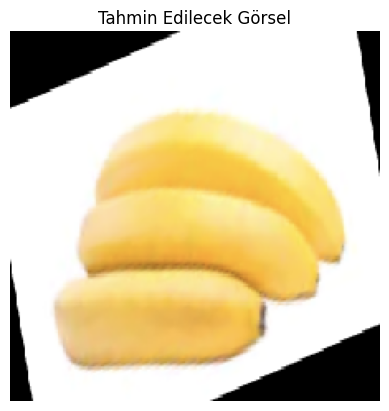

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Tahmin: freshbanana
Güven: 100.00%


In [29]:
model = tf.keras.models.load_model(model_path)

img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title("Tahmin Edilecek Görsel")
plt.show()

img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
confidence = np.max(predictions[0])

print(f"Tahmin: {class_names[predicted_class_index]}")
print(f"Güven: {confidence * 100:.2f}%")
